In [1]:
# import dependencies
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
import models as tests

In [2]:
# Read in csv file
df = pd.read_csv('../datasets/winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# Check for unique values of quality column
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [4]:
# Creating threshold for bad category
threshold = 6
df['quality'] = df['quality'].where(df['quality'] > threshold, other=0)

# Check quality column for unique value changes
print(df['quality'].unique())

[0 7 8 9]


In [5]:
# Create threshold for good category
threshold = 7
df['quality'] = df['quality'].where(df['quality'] < threshold, other=1)

# Check quality column for value changes
print(df['quality'].unique())

[0 1]


In [6]:
# Check column names and for null values
print(f'null check \n{df.isnull().sum()}')

null check 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
# Set X and y values for determining feature importance
X = df.drop(columns=['quality'])
y = df['quality']

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [8]:
# Split data to check feature importance
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=13)

In [9]:
# ravel the data to flatten it for models
y_train = y_train.ravel()
y_test = y_test.ravel()


In [10]:
# Create initial Random Forest Classifier Model to determine feature importance
rf_importance = RandomForestClassifier(random_state=13)

# Fit data to initial Random Forest Classifier Model
rf_importance.fit(X_train, y_train)

RandomForestClassifier(random_state=13)

In [11]:
# Make predictions to determine feature importance
y_train_pred = rf_importance.predict(X_train)
y_test_pred = rf_importance.predict(X_test)

In [12]:
# Create variables to store accuracy_scores and Balanced Accuracy training and test scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
balanced_test = balanced_accuracy_score(y_test, y_test_pred)

# Show results of initial Random Forest Classifier Model
print(f'\nRandom Forest \nTrain Accuracy: {train_accuracy}\nTest Accuracy: {test_accuracy}\nBalanced Test Score: {balanced_test}')


Random Forest 
Train Accuracy: 1.0
Test Accuracy: 0.8816326530612245
Balanced Test Score: 0.7822449778971519


In [13]:
# Create feature_importance_ instance to View most important features

# Create variable to store most important features
importances = rf_importance.feature_importances_

# Sort most important features for better usage
importances_sorted = sorted(zip(importances, X.columns), reverse=True)

# View most important features
print("Most Important Features:")

# Loop through to display features and importance percentage
for importance, feature in importances_sorted[:11]:
    print(f"{feature}: {importance:.4f}")

Most Important Features:
alcohol: 0.1609
density: 0.1259
total sulfur dioxide: 0.0859
residual sugar: 0.0842
pH: 0.0841
volatile acidity: 0.0827
free sulfur dioxide: 0.0824
chlorides: 0.0805
sulphates: 0.0757
citric acid: 0.0708
fixed acidity: 0.0668


In [14]:
# Drop columns based on feature importance and set as X, and y variables
X = df.drop(columns=['quality','fixed acidity','citric acid'])
y = df['quality']
X

,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.27,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,0.30,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,0.28,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,0.23,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,0.23,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...
4893,0.21,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,0.32,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,0.24,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,0.29,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8



Random Forest 
Test Accuracy: 0.8816326530612245
balanced test score: 0.7822449778971519
classification report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       966
           1       0.78      0.61      0.69       259

    accuracy                           0.88      1225
   macro avg       0.84      0.78      0.81      1225
weighted avg       0.88      0.88      0.88      1225


Gradient Boost 
Test Accuracy: 0.8326530612244898
balanced test score: 0.6861955122824688

 classification report: 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       966
           1       0.66      0.43      0.52       259

    accuracy                           0.83      1225
   macro avg       0.76      0.69      0.71      1225
weighted avg       0.82      0.83      0.82      1225


Logistic Regression 
Test Accuracy: 0.8
balanced test score: 0.6004980135414918
classification report: 
        

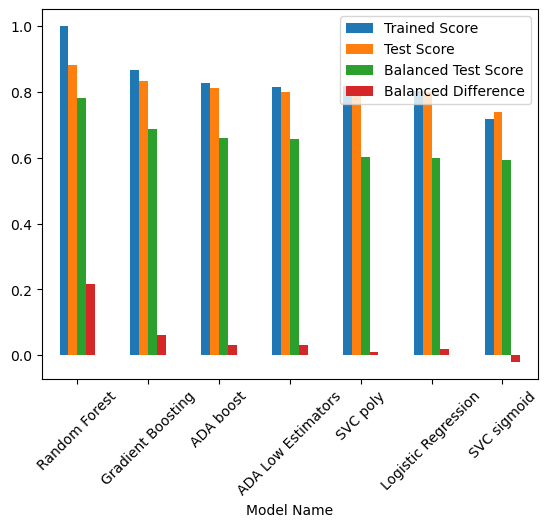

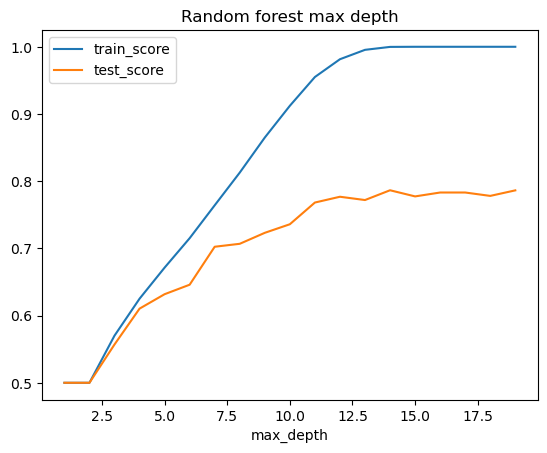

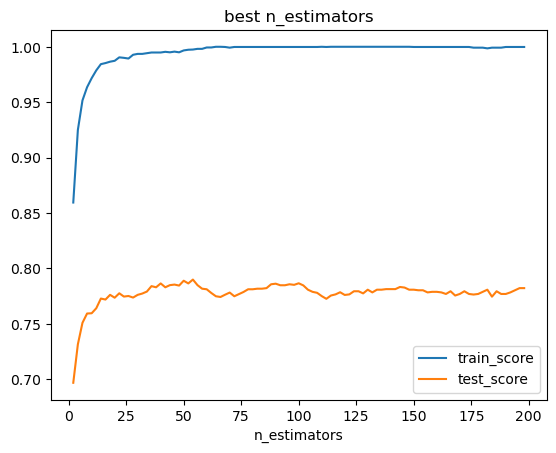

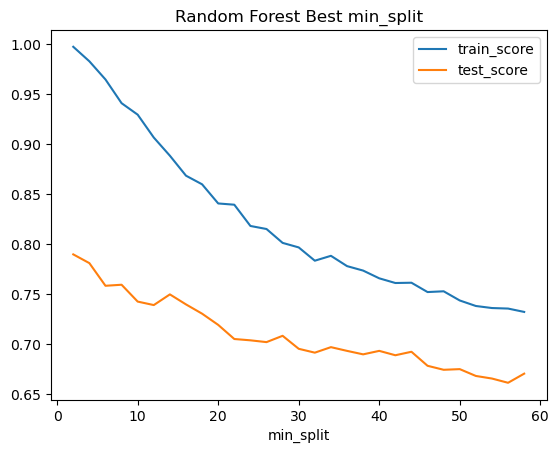

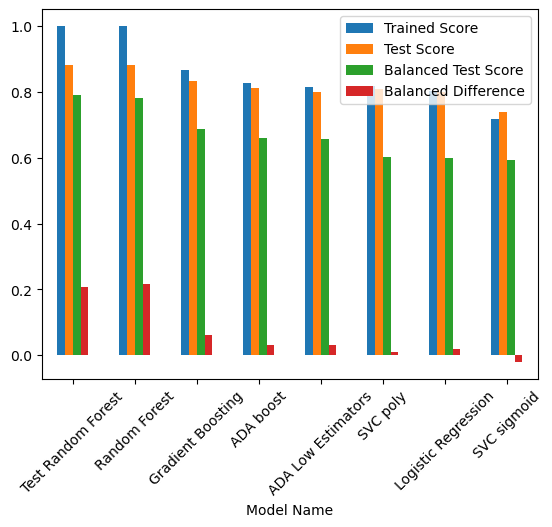

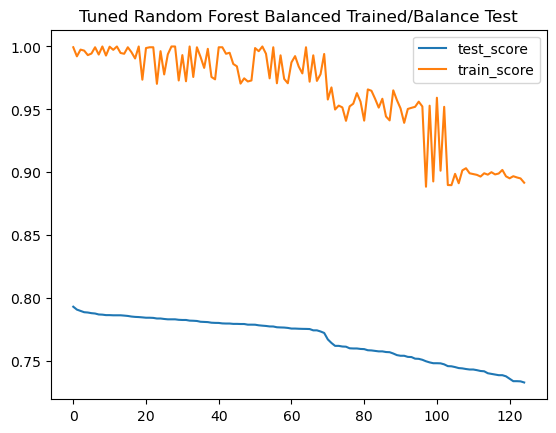

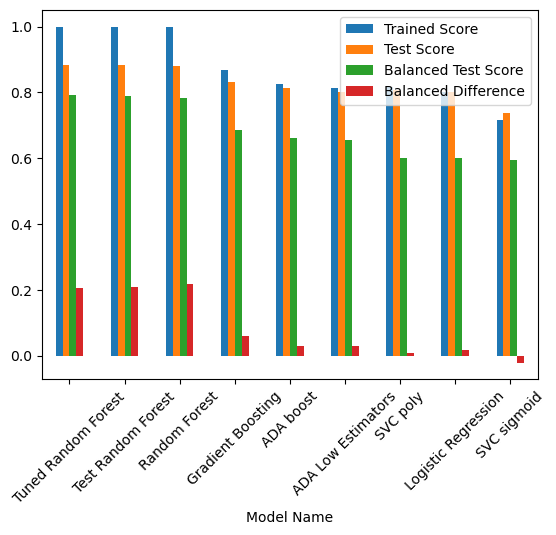

In [15]:
# Run processed data through 'many_models_no_leaf' function to determine if
# 'min_leaf' and 'max_leaf' are needed (much more efficient)
models_no_leaf = tests.many_models_no_leaf(X_train,y_train,X_test,y_test)


Random Forest 
Test Accuracy: 0.8816326530612245
balanced test score: 0.7822449778971519
classification report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       966
           1       0.78      0.61      0.69       259

    accuracy                           0.88      1225
   macro avg       0.84      0.78      0.81      1225
weighted avg       0.88      0.88      0.88      1225


Gradient Boost 
Test Accuracy: 0.8326530612244898
balanced test score: 0.6861955122824688

 classification report: 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       966
           1       0.66      0.43      0.52       259

    accuracy                           0.83      1225
   macro avg       0.76      0.69      0.71      1225
weighted avg       0.82      0.83      0.82      1225


Logistic Regression 
Test Accuracy: 0.8
balanced test score: 0.6004980135414918
classification report: 
        

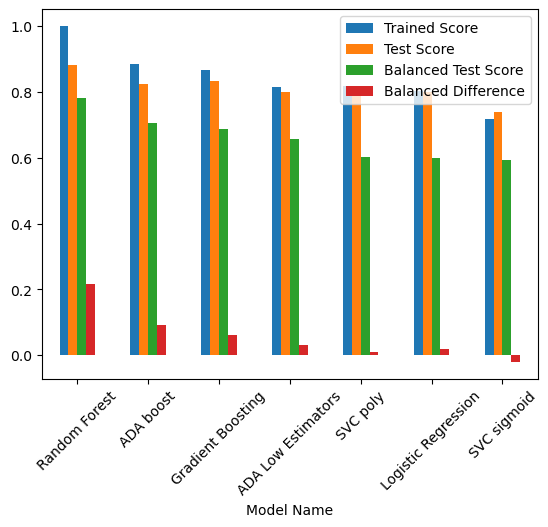

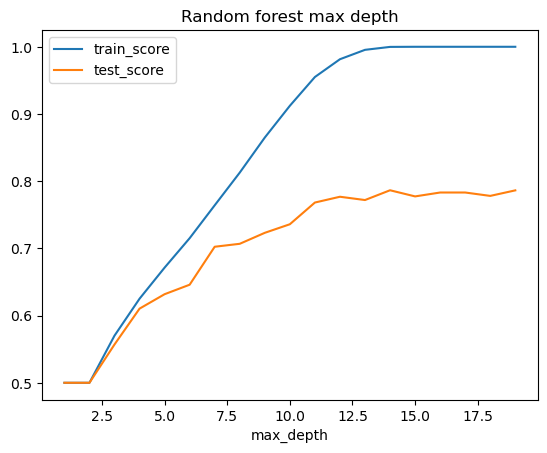

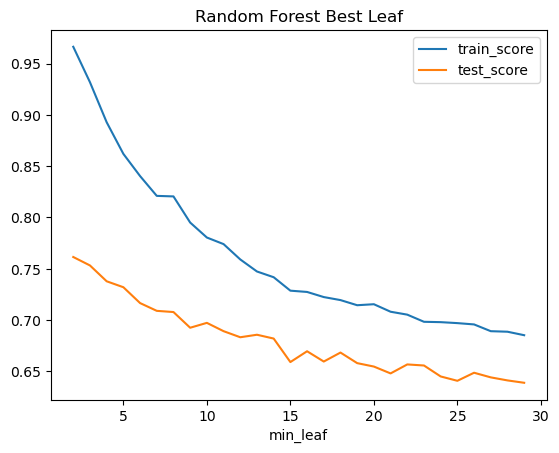

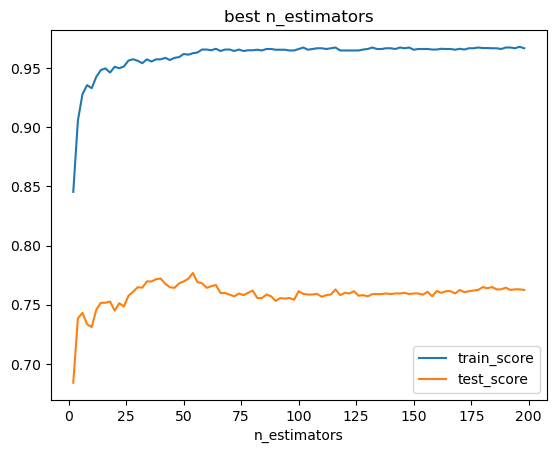

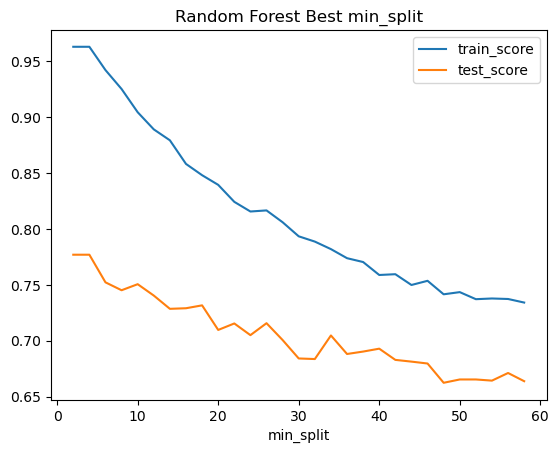

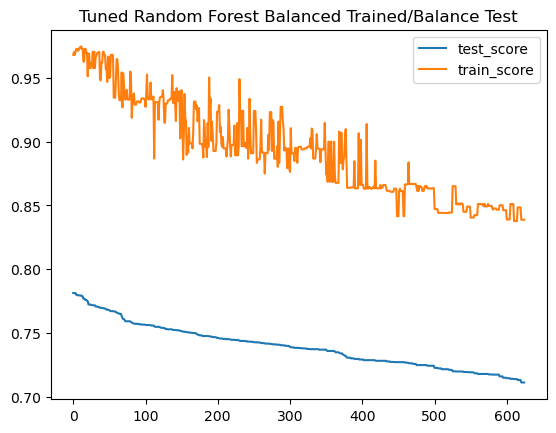

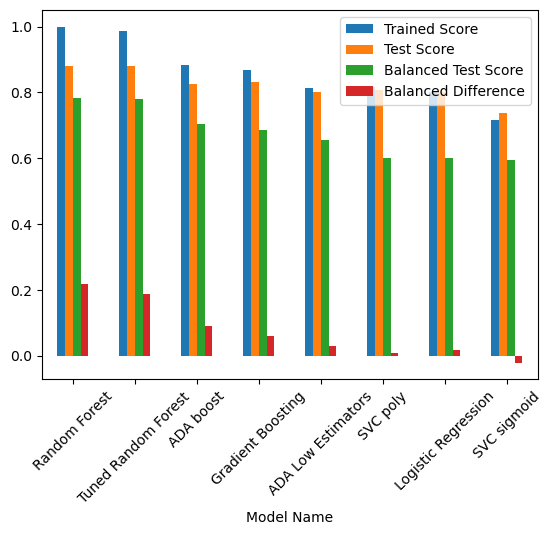

In [16]:
models_min_leaf = tests.many_models_min_leaf(X_train,y_train,X_test,y_test)


Random Forest 
Test Accuracy: 0.8816326530612245
balanced test score: 0.7822449778971519
classification report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       966
           1       0.78      0.61      0.69       259

    accuracy                           0.88      1225
   macro avg       0.84      0.78      0.81      1225
weighted avg       0.88      0.88      0.88      1225


Gradient Boost 
Test Accuracy: 0.8326530612244898
balanced test score: 0.6861955122824688

 classification report: 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       966
           1       0.66      0.43      0.52       259

    accuracy                           0.83      1225
   macro avg       0.76      0.69      0.71      1225
weighted avg       0.82      0.83      0.82      1225


Logistic Regression 
Test Accuracy: 0.8
balanced test score: 0.6004980135414918
classification report: 
        

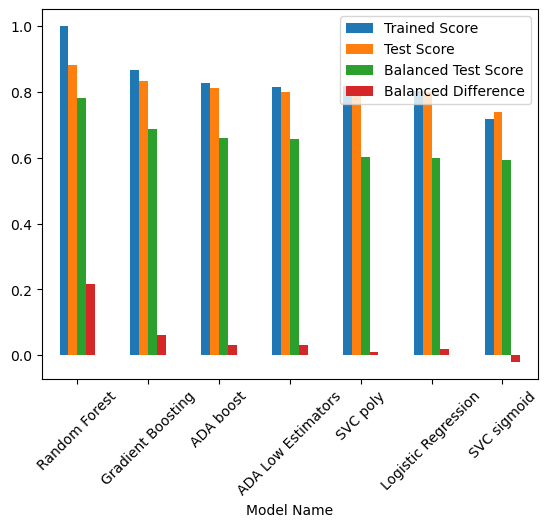

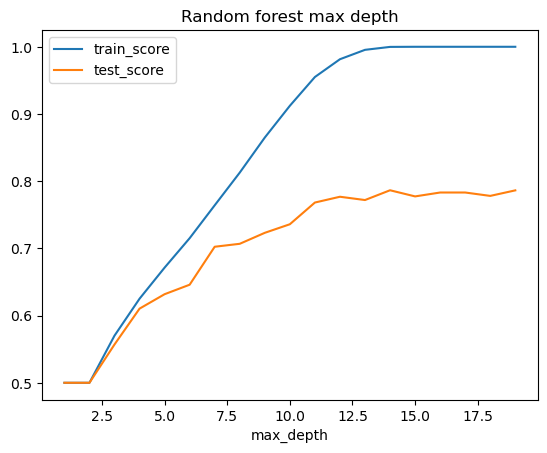

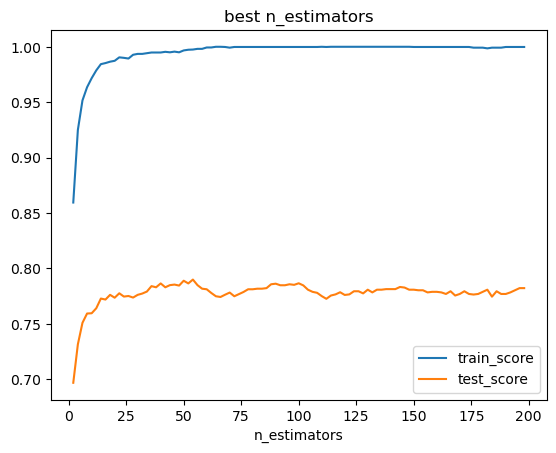

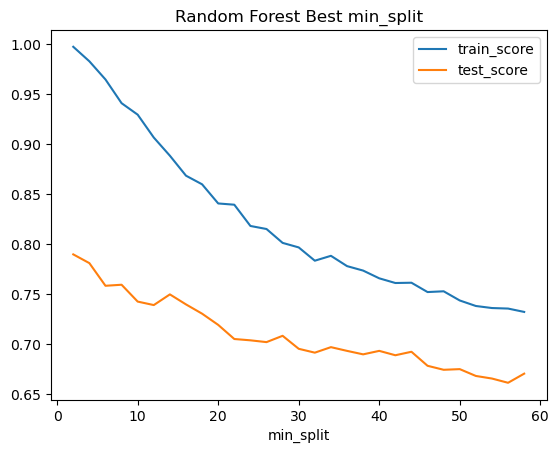

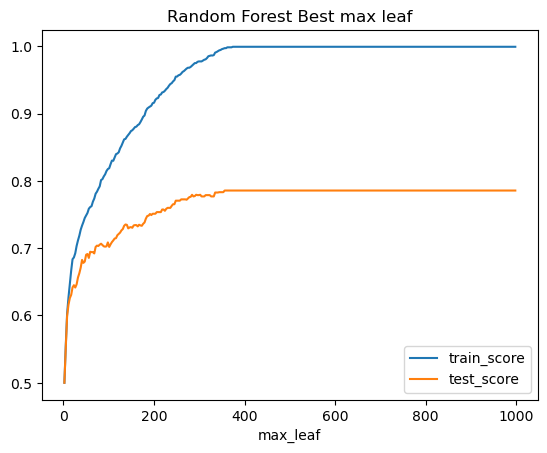

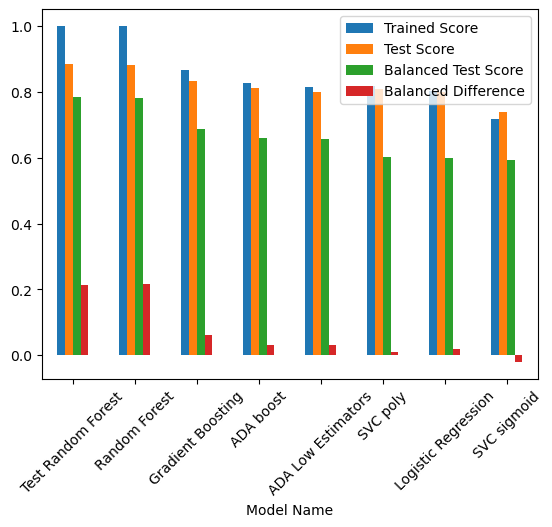

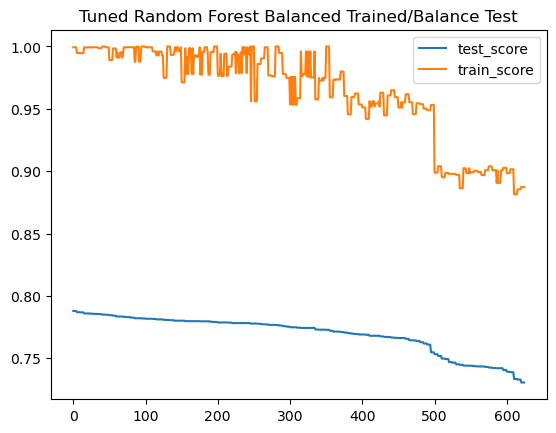

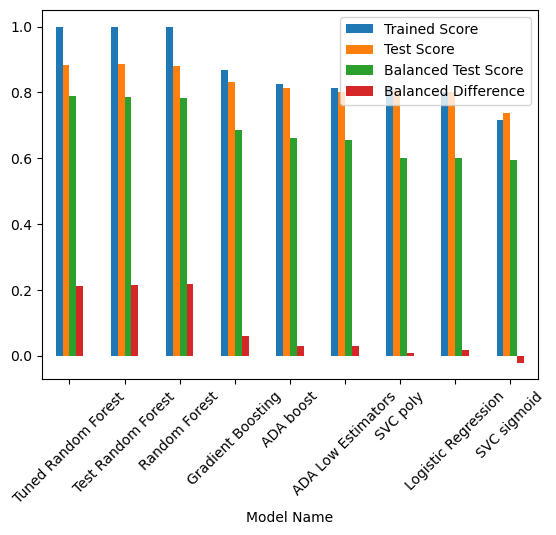

In [17]:
# Run processed data through 'many_models_max_leaf' to determine if 'max_leaf'
# is important (slow)
models_max_leaf = tests.many_models_max_leaf(X_train,y_train,X_test,y_test)


Random Forest 
Test Accuracy: 0.8816326530612245
balanced test score: 0.7822449778971519
classification report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       966
           1       0.78      0.61      0.69       259

    accuracy                           0.88      1225
   macro avg       0.84      0.78      0.81      1225
weighted avg       0.88      0.88      0.88      1225


Gradient Boost 
Test Accuracy: 0.8326530612244898
balanced test score: 0.6861955122824688

 classification report: 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       966
           1       0.66      0.43      0.52       259

    accuracy                           0.83      1225
   macro avg       0.76      0.69      0.71      1225
weighted avg       0.82      0.83      0.82      1225


Logistic Regression 
Test Accuracy: 0.8
balanced test score: 0.6004980135414918
classification report: 
        

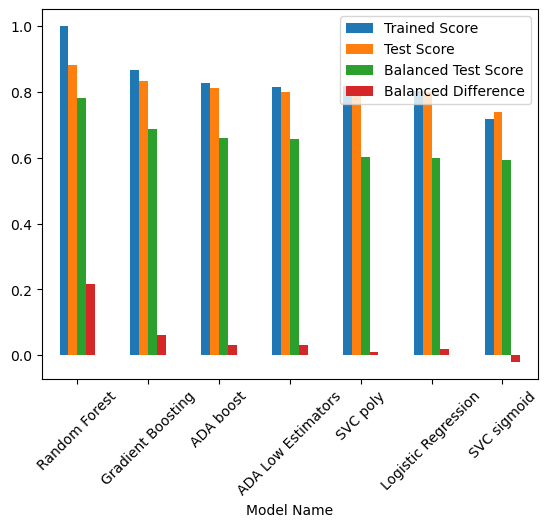

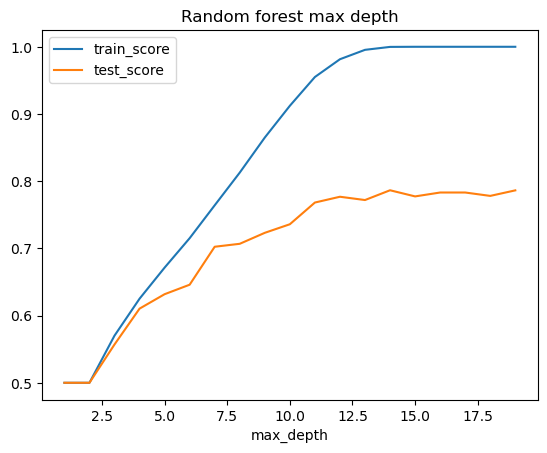

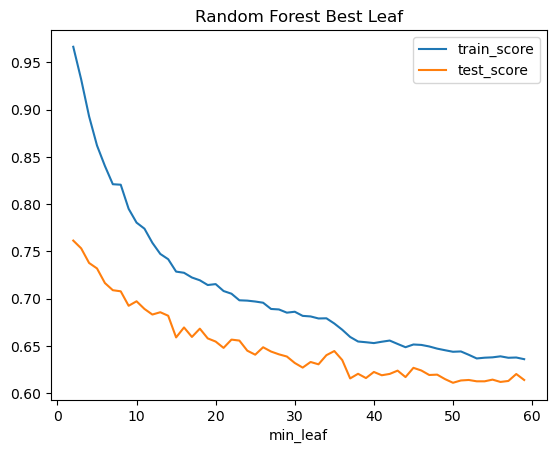

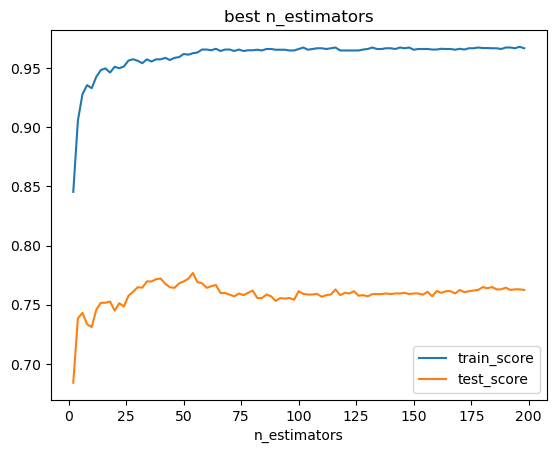

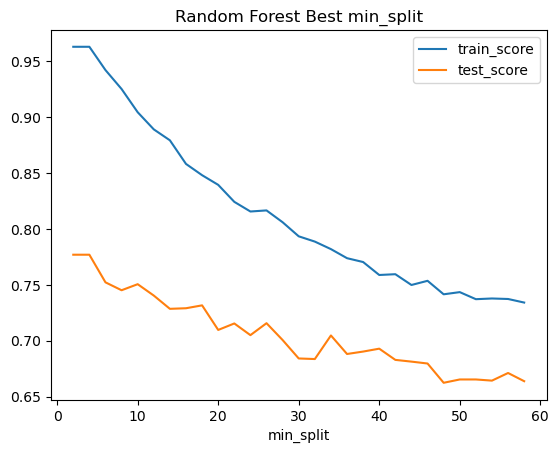

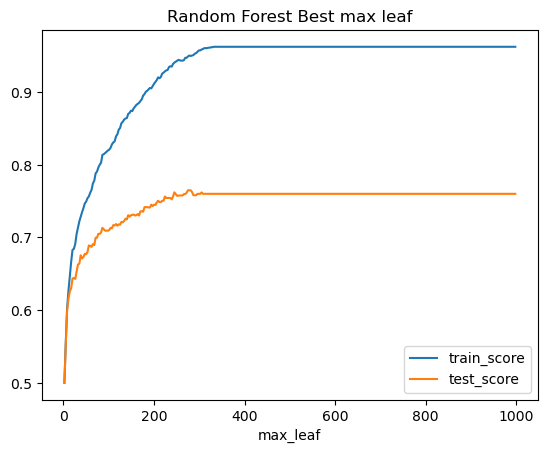

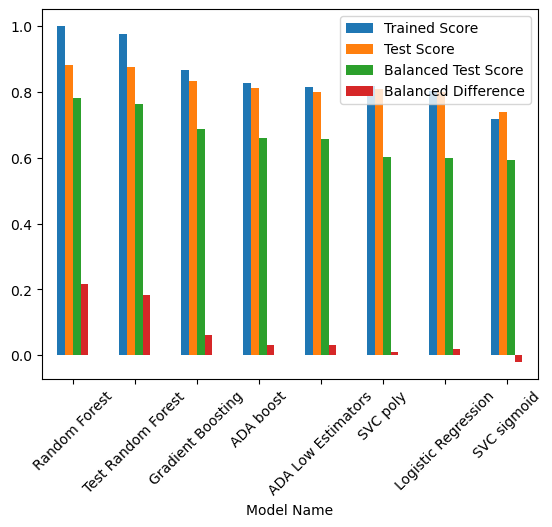

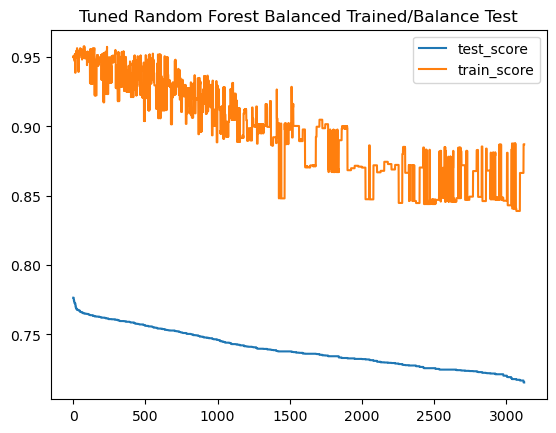

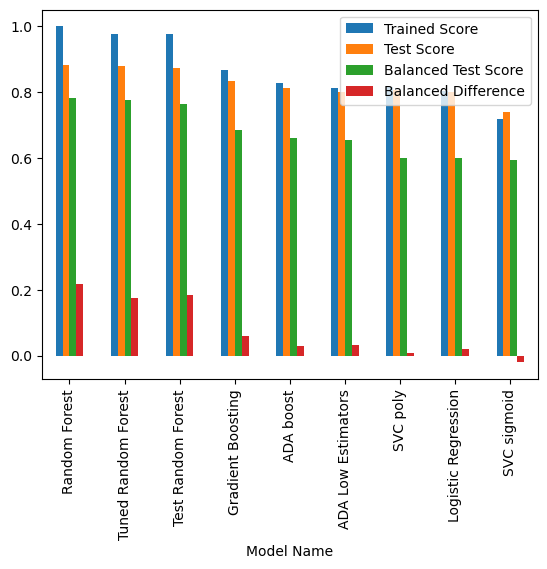

: 

In [18]:
# Run processed data through 'many_models_full' to determine
# if 'min_leaf' and 'max_leaf' help score (least efficient)
models_full = tests.many_models_full(X_train,y_train,X_test,y_test)